In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
marketing = pd.read_csv('DirectMarketing.csv')

In [3]:
train_indices, test_indices = train_test_split(np.array(marketing.index), test_size=0.2, random_state=0)

marketing_train = marketing.loc[train_indices].copy()
marketing_test = marketing.loc[test_indices].copy()

In [4]:
marketing_train.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
687,Old,Male,Rent,Married,Close,34500,0,Medium,12,802
500,Young,Female,Rent,Married,Close,79400,0,NaN,6,1175
332,Middle,Male,Own,Single,Close,60300,0,NaN,24,2091
979,Middle,Female,Own,Married,Close,82000,0,High,18,1800
817,Middle,Female,Own,Married,Far,77600,3,Medium,12,858


In [5]:
marketing_dummies = pd.get_dummies(marketing_train)

In [6]:
marketing_dummies.head()

,Salary,Children,Catalogs,AmountSpent,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
687,34500,0,12,802,0,1,0,0,1,0,1,1,0,1,0,0,0,1
500,79400,0,6,1175,0,0,1,1,0,0,1,1,0,1,0,0,0,0
332,60300,0,24,2091,1,0,0,0,1,1,0,0,1,1,0,0,0,0
979,82000,0,18,1800,1,0,0,1,0,1,0,1,0,1,0,1,0,0
817,77600,3,12,858,1,0,0,1,0,1,0,1,0,0,1,0,0,1


In [10]:
marketing_dummies.corr()["AmountSpent"].sort_values(ascending=False)

AmountSpent        1.000000
Salary             0.699973
History_High       0.580216
Married_Married    0.484576
Catalogs           0.459767
OwnHome_Own        0.370616
Age_Middle         0.321491
Location_Far       0.242826
Gender_Male        0.181693
Age_Old            0.103498
History_Medium    -0.127086
Gender_Female     -0.181693
Children          -0.228622
Location_Close    -0.242826
OwnHome_Rent      -0.370616
Age_Young         -0.445200
Married_Single    -0.484576
History_Low       -0.498353
Name: AmountSpent, dtype: float64

In [14]:
marketing_train["History"].unique()

array(['Medium', nan, 'High', 'Low'], dtype=object)

In [19]:
marketing_train.loc[marketing_train["History"] == "High", "AmountSpent"].std()

877.3091882895484

In [20]:
marketing_train.groupby('History')['AmountSpent'].describe()

,count,mean,std,min,25%,50%,75%,max
History,,,,,,,,
High,199.0,2103.914573,877.309188,565.0,1512.50,1931.0,2530.5,5830.0
Low,185.0,348.989189,207.653348,38.0,202.00,292.0,457.0,1120.0
Medium,174.0,960.143678,327.947227,438.0,705.75,908.0,1159.0,2090.0


In [22]:
marketing_train.groupby('History')['AmountSpent'].describe().reindex(['High', 'Medium', 'Low']).round(1)

,count,mean,std,min,25%,50%,75%,max
History,,,,,,,,
High,199.0,2103.9,877.3,565.0,1512.5,1931.0,2530.5,5830.0
Medium,174.0,960.1,327.9,438.0,705.8,908.0,1159.0,2090.0
Low,185.0,349.0,207.7,38.0,202.0,292.0,457.0,1120.0


In [23]:
marketing_train.groupby('Married')['AmountSpent'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
Married,,,,,,,,
Married,388.0,1638.0,977.3,93.0,858.0,1512.0,2234.2,5830.0
Single,412.0,750.3,590.7,38.0,303.0,576.0,1009.8,4182.0


In [24]:
marketing_train["Married"].unique()

array(['Married', 'Single'], dtype=object)

/Users/jameschok/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


(0, 6119.6)

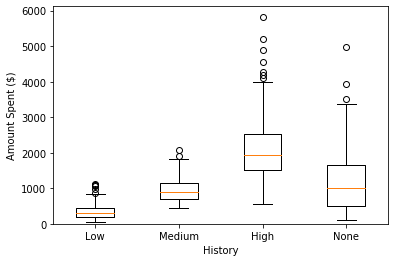

In [27]:
history_data = [marketing_train.loc[marketing_train['History'] == 'Low', 'AmountSpent'],
                marketing_train.loc[marketing_train['History'] == 'Medium', 'AmountSpent'],
                marketing_train.loc[marketing_train['History'] == 'High', 'AmountSpent'],
                marketing_train.loc[marketing_train['History'].isna(), 'AmountSpent']]

plt.boxplot(history_data)

plt.ylabel('Amount Spent ($)')
plt.xlabel('History')

plt.xticks(range(1, 5), ['Low', 'Medium', 'High', 'None'])

plt.ylim(bottom=0)

/Users/jameschok/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


(0, 6119.6)

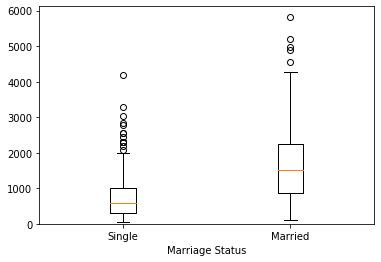

In [29]:
married_data = [marketing_train.loc[marketing_train['Married'] == 'Single', 'AmountSpent'],
                marketing_train.loc[marketing_train['Married'] == 'Married', 'AmountSpent']]
plt.boxplot(married_data)
plt.xlabel('Marriage Status')
plt.xticks(range(1, 3), ['Single', 'Married'])
plt.ylim(bottom=0)

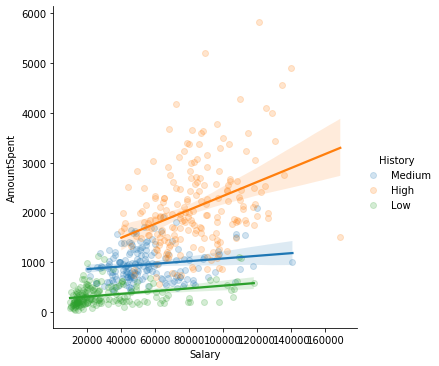

In [32]:
sns.lmplot(y='AmountSpent', x="Salary", data=marketing_train, hue='History', 
           scatter_kws={"alpha": 0.2})

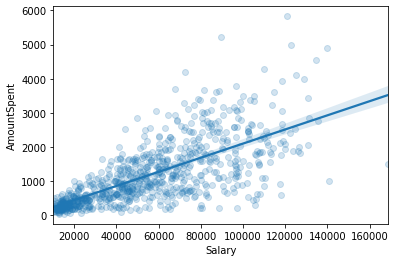

In [36]:
sns.regplot(x=marketing_train["Salary"], y=marketing_train["AmountSpent"], scatter_kws={"alpha": 0.2})

(0, 6000)

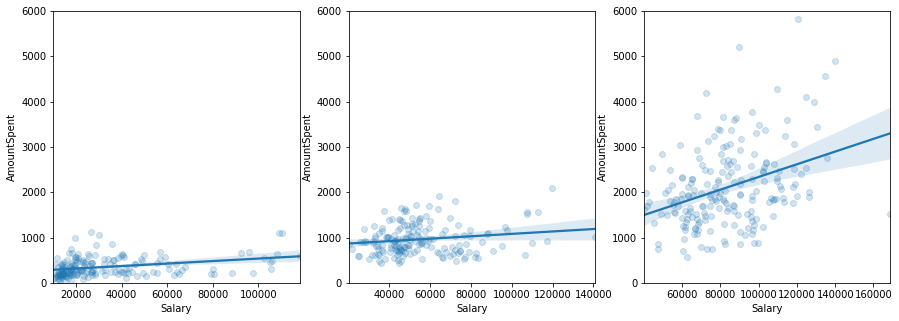

In [40]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
x = marketing_train.loc[marketing_train["History"] == "Low", "Salary"]
y = marketing_train.loc[marketing_train["History"] == "Low", "AmountSpent"]
sns.regplot(x=x, y=y, scatter_kws={"alpha": 0.2})
plt.ylim(0, 6000)

plt.subplot(1, 3, 2)
x = marketing_train.loc[marketing_train["History"] == "Medium", "Salary"]
y = marketing_train.loc[marketing_train["History"] == "Medium", "AmountSpent"]
sns.regplot(x=x, y=y, scatter_kws={"alpha": 0.2})
plt.ylim(0, 6000)

plt.subplot(1, 3, 3)
x = marketing_train.loc[marketing_train["History"] == "High", "Salary"]
y = marketing_train.loc[marketing_train["History"] == "High", "AmountSpent"]
sns.regplot(x=x, y=y, scatter_kws={"alpha": 0.2})
plt.ylim(0, 6000)

([<matplotlib.axis.XTick at 0x7fcb80f01050>,
 <a list of 8 Text xticklabel objects>)

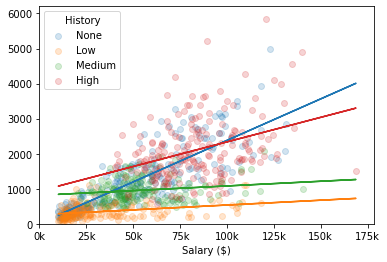

In [42]:
history_y = [marketing_train[marketing_train['History'].isna()]['AmountSpent'],
             marketing_train[marketing_train['History'] == 'Low']['AmountSpent'],
             marketing_train[marketing_train['History'] == 'Medium']['AmountSpent'],
             marketing_train[marketing_train['History'] == 'High']['AmountSpent']]

history_x = [marketing_train[marketing_train['History'].isna()]['Salary'],
             marketing_train[marketing_train['History'] == 'Low']['Salary'],
             marketing_train[marketing_train['History'] == 'Medium']['Salary'],
             marketing_train[marketing_train['History'] == 'High']['Salary']]
labels = ['None', 'Low', 'Medium', 'High']

for i in range(len(history_y)):
    plt.scatter(history_x[i], history_y[i], alpha=0.2, label=labels[i])
    
    # Performs Regression
    coefs = np.polyfit(history_x[i], history_y[i], 1)  # b0 + b1*X + b2*X^2 + b3*X^3 + ...
    p = np.poly1d(coefs)
    
    plt.plot(marketing_train['Salary'], p(marketing_train['Salary']))

plt.xlabel('Salary ($)')
plt.ylim(bottom=0)
plt.legend(title='History')
plt.xticks(range(0, int(200e3), int(25e3)), ['{}k'.format(i) for i in range(0, 200, 25)])

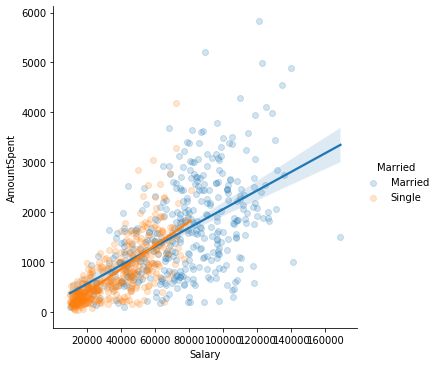

In [44]:
sns.lmplot(y='AmountSpent', x="Salary", data=marketing_train, hue='Married', 
           scatter_kws={"alpha": 0.2})

In [43]:
marketing_train.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
687,Old,Male,Rent,Married,Close,34500,0,Medium,12,802
500,Young,Female,Rent,Married,Close,79400,0,NaN,6,1175
332,Middle,Male,Own,Single,Close,60300,0,NaN,24,2091
979,Middle,Female,Own,Married,Close,82000,0,High,18,1800
817,Middle,Female,Own,Married,Far,77600,3,Medium,12,858


In [49]:
marketing = pd.read_csv("DirectMarketing.csv")
marketing = marketing.loc[:, ["AmountSpent", "Salary", "History"]]

marketing.head()

,AmountSpent,Salary,History
0,755,47500,High
1,1318,63600,High
2,296,13500,Low
3,2436,85600,High
4,1304,68400,High


In [54]:
marketing_with_dummies = pd.get_dummies(marketing, drop_first=True, dummy_na=True)
marketing_with_dummies.head()

,AmountSpent,Salary,History_Low,History_Medium,History_nan
0,755,47500,0,0,0
1,1318,63600,0,0,0
2,296,13500,1,0,0
3,2436,85600,0,0,0
4,1304,68400,0,0,0


In [55]:
train_indices, test_indices = train_test_split(np.array(marketing_with_dummies.index), 
                                               test_size=0.2, random_state=0)

marketing_train = marketing_with_dummies.loc[train_indices].copy()
marketing_test = marketing_with_dummies.loc[test_indices].copy()

In [56]:
marketing_train.head()

,AmountSpent,Salary,History_Low,History_Medium,History_nan
687,802,34500,0,1,0
500,1175,79400,0,0,1
332,2091,60300,0,0,1
979,1800,82000,0,0,0
817,858,77600,0,1,0


In [73]:
y_train = np.log(marketing_train["AmountSpent"])

x_train = marketing_train.drop(columns=["AmountSpent"])
x_train = sm.add_constant(x_train)

In [74]:
model = sm.OLS(y_train, x_train).fit()

In [75]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          1.20e-203
Time:                        14:25:07   Log-Likelihood:                -556.01
No. Observations:                 800   AIC:                             1122.
Df Residuals:                     795   BIC:                             1145.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.4894      0.067     97.

In [76]:
fitted_values = model.fittedvalues
residuals = model.resid

In [77]:
y_train - model.fittedvalues

687    0.142189
500   -0.119992
332    0.703457
979   -0.054546
817   -0.347850
         ...   
835   -0.050987
192    0.441413
629    0.284856
559   -0.329854
684    0.555728
Length: 800, dtype: float64

In [78]:
residuals

687    0.142189
500   -0.119992
332    0.703457
979   -0.054546
817   -0.347850
         ...   
835   -0.050987
192    0.441413
629    0.284856
559   -0.329854
684    0.555728
Length: 800, dtype: float64

$$\large Y = f(x) + \varepsilon$$

Importantly $\varepsilon$ is random

$$\large Y - f(x) = \varepsilon$$

Text(0.5, 0, 'Fitted Values (Model Prediction)')

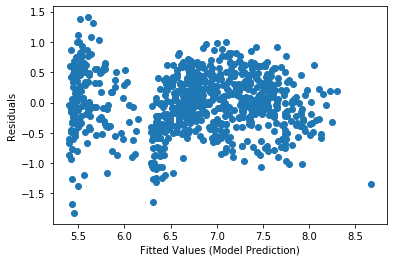

In [79]:
plt.scatter(fitted_values, residuals)
plt.ylabel("Residuals")
plt.xlabel("Fitted Values (Model Prediction)")

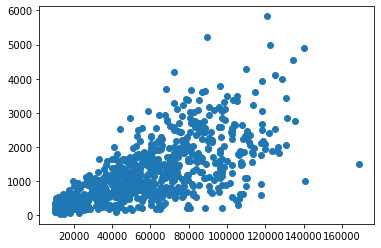

In [80]:
plt.scatter(marketing_train["Salary"], marketing_train["AmountSpent"])

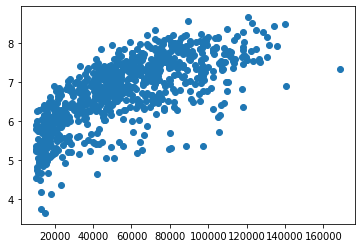

In [81]:
plt.scatter(marketing_train["Salary"], np.log(marketing_train["AmountSpent"]))

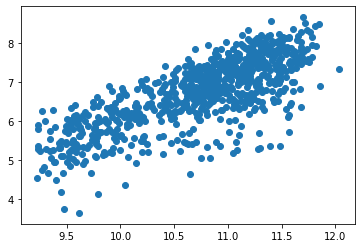

In [82]:
plt.scatter(np.log(marketing_train["Salary"]), np.log(marketing_train["AmountSpent"]))

Text(0, 0.5, 'Log AmountSpent')

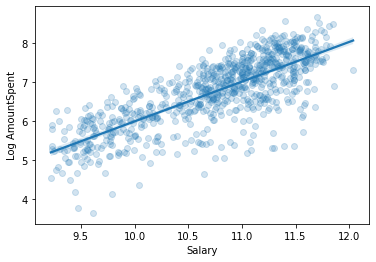

In [86]:
ax = sns.regplot(x=np.log(marketing_train["Salary"]), y=np.log(marketing_train["AmountSpent"]), 
                 scatter_kws={"alpha": 0.2})
ax.set_ylabel("Log AmountSpent")

In [93]:
marketing = pd.read_csv("DirectMarketing.csv")
marketing = marketing.loc[:, ["AmountSpent", "Salary", "History"]]

# Conver to Dummy
marketing = pd.get_dummies(marketing, drop_first=True, dummy_na=True)

marketing["log-Salary"] = np.log(marketing["Salary"])
marketing = marketing.drop(columns=["Salary"])

marketing["Medium * log-Salary"] = marketing["log-Salary"] * marketing["History_Medium"]
marketing["Nan * log-Salary"] = marketing["log-Salary"] * marketing["History_nan"]

marketing.head()

,AmountSpent,History_Low,History_Medium,History_nan,log-Salary,Medium * log-Salary,Nan * log-Salary
0,755,0,0,0,10.768485,0.0,0.0
1,1318,0,0,0,11.060369,0.0,0.0
2,296,1,0,0,9.510445,0.0,0.0
3,2436,0,0,0,11.357441,0.0,0.0
4,1304,0,0,0,11.133128,0.0,0.0


In [94]:
# Split Train test
train_indices, test_indices = train_test_split(np.array(marketing.index), 
                                               test_size=0.2, random_state=0)

marketing_train = marketing.loc[train_indices].copy()
marketing_test = marketing.loc[test_indices].copy()

In [95]:
marketing_train.head()

,AmountSpent,History_Low,History_Medium,History_nan,log-Salary,Medium * log-Salary,Nan * log-Salary
687,802,0,1,0,10.448715,10.448715,0.000000
500,1175,0,0,1,11.282254,0.000000,11.282254
332,2091,0,0,1,11.007087,0.000000,11.007087
979,1800,0,0,0,11.314475,0.000000,0.000000
817,858,0,1,0,11.259323,11.259323,0.000000


In [96]:
y_train = np.log(marketing_train["AmountSpent"])

x_train = marketing_train.drop(columns=["AmountSpent"])
x_train = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     451.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          8.42e-252
Time:                        14:41:54   Log-Likelihood:                -437.76
No. Observations:                 800   AIC:                             889.5
Df Residuals:                     793   BIC:                             922.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.2584    

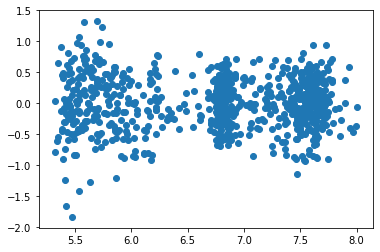

In [99]:
plt.scatter(model.fittedvalues, model.resid)